## SMS Spam Classifier: Multinomial Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building 
    - Model evaluation

### 1. Importing and Preprocessing Data

In [1]:
### importing libraries
import pandas as pd
import numpy as np


In [2]:
## importing and reading the dataset
## this dataset is not in the usual .csv format
docs = pd.read_table('SMSSpamCollection',header = None, names=['Class','sms'])

In [3]:
## checking docs
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
docs.shape

(5572, 2)

In [5]:
## counting spam and ham to ensure that there is no class imbalance
docs['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [6]:
747/4825*100

15.481865284974095

In [7]:
747/(747+4825)*100

13.406317300789663

- Since the 'ham' values are about 15% of the 'spam', and 13% of overall records,that means there is no class imbalance.
- Had the 'ham' values been around say less that 1% then there would've been class imbalance.

### Converting class labels to binary
- WE will map spam to 1 and ham to 0.

In [8]:
## mapping spam and ham to 1 and 0 respectively
docs['Class'] = docs['Class'].map({'spam':1,'ham':0})

In [9]:
## checking docs
docs.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Making X and y lables

In [10]:
X = docs['sms']
y = docs['Class']

In [11]:
print(X)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Class, Length: 5572, dtype: int64


In [12]:
X.shape

(5572,)

In [13]:
y.shape

(5572,)

In [14]:
## checking dtype of y
y.dtype

dtype('int64')

- dtype of y is int, so no need to convert it.

### Splitting X and y into test and train sets

In [15]:
## importing libraries
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [17]:
X_train.head()

3730                             I'm at home. Please call
974                          what is your account number?
4583    Wow didn't think it was that common. I take it...
4028        Yes, princess. Are you going to make me moan?
1447    Looks like u wil b getting a headstart im leav...
Name: sms, dtype: object

In [18]:
X_train.shape

(3900,)

In [19]:
y_train.head()

3730    0
974     0
4583    0
4028    0
1447    0
Name: Class, dtype: int64

In [20]:
y_train.shape

(3900,)

### Creating Bag of Words representation

- We will follow the normal cycle:
    - First, we will instantiate an object of CountVectorizer( ) class. This object is contained in the library sklearn.feature_extraction.text ( as we are basically extracting features from text.
    - And then, we will fit( ) the X_train array into the object.
    - Finally, we will transform( ) the X_train array and X_test array into a feature vector.
    - Remeber, while working on the test data, we will never use fit( ) method of any class, as in real life we never/rarely have test data!
    - So, for test data we only use the transform( ).

In [21]:
## importing libraries
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
## Instantiate an object of CountVectorizer( ) class.
ver = CountVectorizer(stop_words='english')

In [23]:
## fit( ) the X_train array into the object.
ver.fit(X_train)

CountVectorizer(stop_words='english')

In [24]:
ver.vocabulary_

{'home': 3114,
 'account': 733,
 'number': 4355,
 'wow': 6797,
 'didn': 2076,
 'think': 6112,
 'common': 1733,
 'ur': 6438,
 'freak': 2673,
 'unless': 6409,
 'chop': 1630,
 'yes': 6866,
 'princess': 4837,
 'going': 2849,
 'make': 3897,
 'moan': 4080,
 'looks': 3775,
 'like': 3693,
 'wil': 6712,
 'getting': 2812,
 'headstart': 3028,
 'im': 3236,
 'leaving': 3651,
 'bout': 1306,
 '30ish': 393,
 'desperate': 2051,
 'company': 1736,
 'head': 3023,
 'earlier': 2251,
 'goin': 2848,
 'meet': 3982,
 'rummer': 5237,
 'dont': 2172,
 'know': 3555,
 'bring': 1361,
 'food': 2631,
 'save': 5303,
 'money': 4108,
 'wedding': 6649,
 'lingerie': 3712,
 'www': 6822,
 'bridal': 1354,
 'petticoatdreams': 4623,
 'uk': 6363,
 'choose': 1628,
 'superb': 5909,
 'selection': 5368,
 'national': 4222,
 'delivery': 2024,
 'brought': 1379,
 'weddingfriend': 6650,
 'sorry': 5654,
 'll': 3737,
 'later': 3619,
 'havent': 3016,
 'got': 2875,
 'urself': 6451,
 'jacket': 3387,
 'ah': 807,
 'ugh': 6357,
 'hopefully': 3130

In [25]:
len(ver.vocabulary_)

6914

In [26]:
## transform( ) the X_train and X_test array into a feature vector.
X_train_transformed = ver.transform(X_train)
X_test_transformed  = ver.transform(X_test)

In [27]:
print(X_train_transformed)
print(X_test_transformed)

  (0, 3114)	1
  (1, 733)	1
  (1, 4355)	1
  (2, 1630)	1
  (2, 1733)	1
  (2, 2076)	1
  (2, 2673)	1
  (2, 6112)	1
  (2, 6409)	1
  (2, 6438)	1
  (2, 6797)	1
  (3, 2849)	1
  (3, 3897)	1
  (3, 4080)	1
  (3, 4837)	1
  (3, 6866)	1
  (4, 393)	1
  (4, 1306)	1
  (4, 1736)	1
  (4, 2051)	1
  (4, 2251)	1
  (4, 2812)	1
  (4, 2848)	1
  (4, 3023)	1
  (4, 3028)	1
  :	:
  (3895, 5099)	1
  (3895, 5857)	1
  (3895, 6033)	1
  (3895, 6195)	1
  (3895, 6428)	1
  (3896, 1486)	1
  (3896, 1709)	1
  (3896, 1938)	1
  (3896, 2879)	1
  (3896, 3661)	1
  (3897, 1591)	1
  (3897, 2903)	1
  (3897, 3417)	1
  (3897, 3474)	1
  (3897, 4052)	1
  (3897, 4113)	1
  (3897, 5010)	1
  (3897, 5361)	1
  (3898, 2253)	1
  (3898, 3430)	1
  (3898, 3774)	1
  (3898, 5964)	1
  (3899, 757)	1
  (3899, 3016)	1
  (3899, 5172)	1
  (0, 3281)	1
  (0, 4033)	1
  (0, 5807)	1
  (0, 5950)	1
  (0, 6309)	1
  (1, 1708)	1
  (1, 2697)	1
  (1, 3529)	1
  (1, 4203)	1
  (1, 4543)	1
  (1, 5338)	1
  (1, 5618)	1
  (1, 5928)	1
  (1, 6580)	1
  (2, 99)	1
  (2, 293)	1
 

In [28]:
type(X_test_transformed)

scipy.sparse.csr.csr_matrix

In [29]:
### checking dtype of y_train and y_test
print(y_train.dtype)
print(y_test.dtype)

int64
int64


- No need to fix these

### 2. Building and Evaluating the Model

In [30]:
## importing libraries
from sklearn.naive_bayes import MultinomialNB

In [31]:
## Instantiating an object of the model class
mnb = MultinomialNB()


In [32]:
## fitting X_train into the object
mnb.fit(X_train_transformed,y_train)

MultinomialNB()

In [33]:
## making predictions on class
y_pred_class = mnb.predict(X_test_transformed)

In [34]:
y_pred_class

array([0, 0, 1, ..., 0, 0, 0])

- For Predicting class lables, the sckit model assumes some threshold and based on that assigns lables for a class.
- Remember that generally , we do this exercise manually, where we assume some probability as a threshold based on optimal value obtained from precision,recall,ROC curve and then give lables.

In [35]:
## making predictions on probability
y_pred_prob = mnb.predict_proba(X_test_transformed)

In [36]:
y_pred_prob

array([[9.94506584e-01, 5.49341623e-03],
       [9.98778526e-01, 1.22147350e-03],
       [5.76808295e-14, 1.00000000e+00],
       ...,
       [9.99909918e-01, 9.00817460e-05],
       [9.99950582e-01, 4.94176966e-05],
       [9.91602665e-01, 8.39733459e-03]])

- Here [9.94506584e-01, 5.49341623e-03] means that the probability of 0 is 9.94506584e-01 and the probability of 1 is  5.49341623e-03

In [37]:
# note that alpha=1 is used by default for Lapalce smoothing
mnb

MultinomialNB()

### Model Evaluation

In [38]:
## importing libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [39]:
## checking accuracy
accuracy_score(y_test,y_pred_class)

0.9844497607655502

In [40]:
## making confusion matrix
confusion_matrix(y_test,y_pred_class)

array([[1438,   10],
       [  16,  208]])

### To calculate metrics like specificity, sensitivityb etc, we will write little code

In [41]:
confusion = confusion_matrix(y_test,y_pred_class)
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]
print(confusion)

[[1438   10]
 [  16  208]]


In [42]:
## calculating sensitivity
sensitivity = TP/(TP+FN)
print('Sensitivity',sensitivity)

Sensitivity 0.9285714285714286


In [43]:
## calculating specificity
specificity = TN/(TN+FP)
print('Specificity',specificity)

Specificity 0.9930939226519337


### Measuring other indicators

In [44]:
## importing libraries
from sklearn.metrics import precision_score, recall_score, f1_score

In [45]:
print("PRECISION SCORE :",precision_score(y_test, y_pred_class))
print("RECALL SCORE :", recall_score(y_test, y_pred_class))
print("F1 SCORE :",f1_score(y_test, y_pred_class))

PRECISION SCORE : 0.9541284403669725
RECALL SCORE : 0.9285714285714286
F1 SCORE : 0.9411764705882353


### Creating ROC curve

In [46]:
## importing libraries
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt 

In [47]:
y_pred_prob[:,1]

array([5.49341623e-03, 1.22147350e-03, 1.00000000e+00, ...,
       9.00817460e-05, 4.94176966e-05, 8.39733459e-03])

In [48]:
## getting values for ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

- y_pred_prob[:,1] gives the prob for y=1 i.e `'spam'`

In [49]:
y_pred_prob.shape

(1672, 2)

In [50]:
## calculating area under ROC
roc_auc = auc(false_positive_rate, true_positive_rate)

In [51]:
roc_auc

0.9862556728492502

### Making a dataframe for values returned from  roc_curve(  )

In [52]:
pd.DataFrame({'Threshold':thresholds,'TPR': true_positive_rate,'FPR':false_positive_rate})

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.308036,0.000000
2,1.000000e+00,0.321429,0.000000
3,1.000000e+00,0.330357,0.000000
4,1.000000e+00,0.339286,0.000000
...,...,...,...
172,4.922197e-14,1.000000,0.979282
173,4.592807e-14,1.000000,0.980663
174,2.489572e-14,1.000000,0.981354
175,1.595609e-14,1.000000,0.982735


- We plot the ROC curve between FPR at x-axis and TPR at y_axis for different values of threshold correspond to each TPR and FPR.

### Plotting the ROC curve

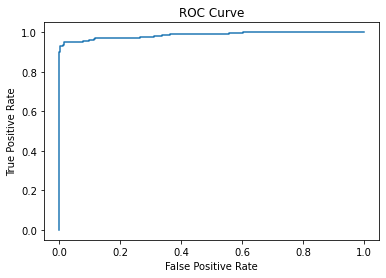

In [57]:
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve")
plt.plot(false_positive_rate,true_positive_rate)
plt.show()
